In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
model_list = [
    "NovaSky-AI/Sky-T1-32B-Preview",
    "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-72B-Instruct",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    # # "internlm/internlm2_5-1_8b-chat",
    # # "internlm/internlm2_5-7b-chat",
    # # "internlm/internlm2_5-20b-chat",
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    "microsoft/phi-4",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct"
]

In [2]:
# PROMP_LIST = ["-sbs-budget-hard", "-aav", "-c2f", "-sbs", "-sbs-hard"]
PROMP_LIST = ["-sbs","-aav"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-72B-Instruct": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    "internlm/internlm2_5-1_8b-chat": "internlm",
    "internlm/internlm2_5-7b-chat": "internlm",
    "internlm/internlm2_5-20b-chat": "internlm",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

In [3]:
def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 100):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
        
        return budget_list


In [4]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [5]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-sbs': [37.3,
   38.4,
   40.7,
   44.0,
   50.9,
   58.5,
   65.0,
   72.6,
   77.6,
   81.4,
   85.8,
   89.0,
   92.6,
   94.2,
   95.6,
   96.0,
   95.9,
   95.8,
   95.9,
   95.9,
   96.1,
   96.2,
   96.1,
   96.1],
  'qwen-aav': [39.3,
   46.6,
   59.2,
   69.5,
   77.9,
   83.7,
   88.5,
   91.1,
   92.6,
   93.8,
   94.6,
   94.5,
   94.9,
   95.0,
   95.1,
   94.8,
   95.1,
   95.1,
   94.9,
   94.8,
   95.0,
   95.0,
   95.0,
   95.1]},
 'Qwen/QwQ-32B-Preview': {'qwen-sbs': [35.4,
   36.2,
   36.5,
   37.5,
   41.5,
   45.7,
   51.0,
   60.0,
   65.8,
   71.0,
   75.7,
   80.1,
   84.8,
   89.0,
   91.0,
   93.7,
   94.5,
   94.6,
   94.8,
   95.5,
   95.3,
   95.5,
   95.5,
   95.2],
  'qwen-aav': [38.5,
   40.3,
   45.6,
   49.5,
   53.1,
   60.9,
   66.9,
   73.3,
   78.1,
   81.0,
   84.8,
   88.4,
   91.1,
   93.1,
   94.0,
   94.6,
   94.9,
   94.8,
   95.1,
   95.5,
   95.6,
   95.2,
   95.3,
   95.5]},
 'Qwen/Qwen2.5-72B-Instru

0 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]
0 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]
0 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]
0 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]
1 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]
1 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]
1 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]
1 [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 375, 425, 475, 525, 575, 625]


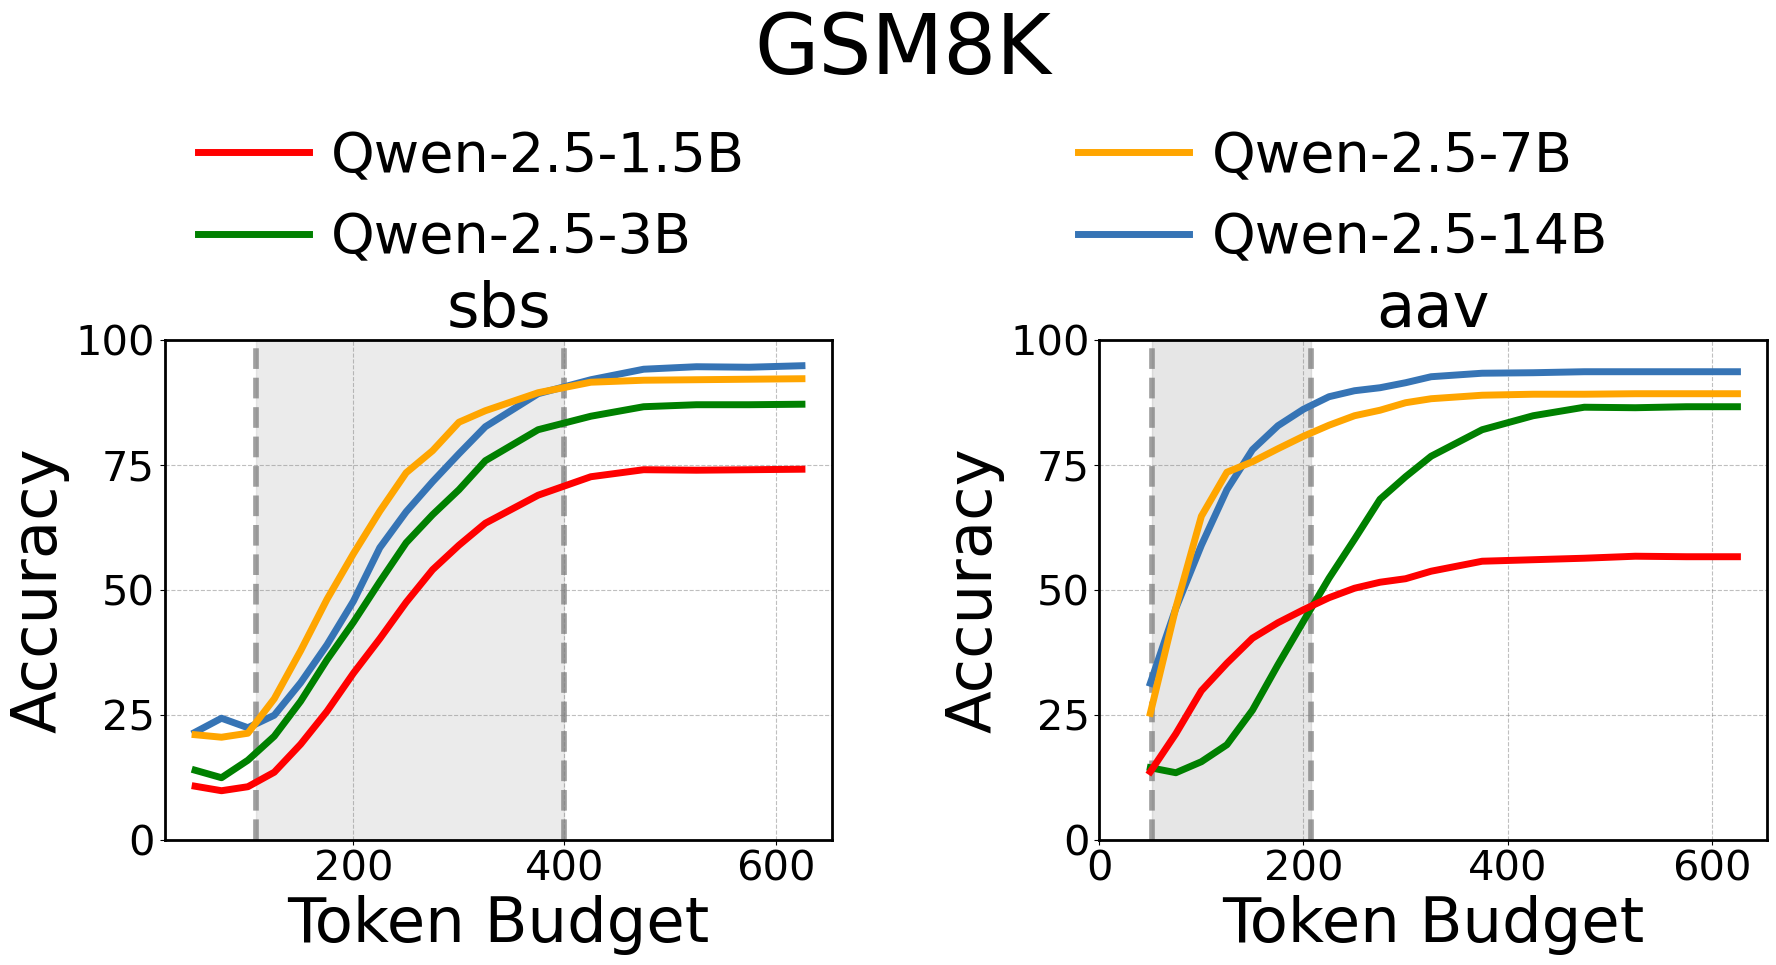

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fontsize = 45
qwen_model_list = [
    # "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
]
line_width = 5  
# Function to find intersection points
def find_intersections(x1, y1, x2, y2):
    intersections = []
    for i in range(len(x1) - 1):
        if (y1[i] - y2[i]) * (y1[i + 1] - y2[i + 1]) < 0:
            intersections.append((x1[i] + x1[i + 1]) / 2)
    return intersections

colors = ["#3674B5", "orange", "green", "red"]

for index, prompt_type in enumerate(PROMP_LIST):
    # Convert single index to row, col indices
    for model in qwen_model_list:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        print(index,budget_list)
        axs[index].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1], linewidth=5, color=colors[qwen_model_list.index(model)])
    
    axs[1].axvline(
        x=52,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[1].axvline(
        x=207,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[1].axvspan(
        xmin=52, 
        xmax=207,           # x range
        # y1=0, y2=100,          # y range
        color='grey',      # fill color
        alpha=0.1,             # transparency
        zorder=0               # ensure shading is behind lines
    )

    # axs[1].axvspan(
    #     xmin=85,
    #     xmax=180,           # x range
    #     color='grey',      # fill color
    #     alpha=0.03,             # transparency
    #     zorder=0               # ensure shading is behind lines
    # )
    # axs[1].axvspan(
    #     xmin=270,
    #     xmax=330,           # x range
    #     color='grey',      # fill color
    #     alpha=0.03,             # transparency
    #     zorder=0               # ensure shading is behind lines
    # )
    # axs[1].axvline(
    #     x=85,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=4,        # line width
    #     alpha=0.1,         # transparency
    #     zorder=1           # layer order
    # )
    # axs[1].axvline(
    #     x=180,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=4,        # line width
    #     alpha=0.1,         # transparency
    #     zorder=1           # layer order
    # )
    # axs[1].axvline(
    #     x=270,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=1,        # line width
    #     alpha=0.5,         # transparency
    #     zorder=1           # layer order
    # )
    # axs[1].axvline(
    #     x=330,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=1,        # line width
    #     alpha=0.5,         # transparency
    #     zorder=1           # layer order
    # )

    axs[0].axvspan(
        xmin=108, 
        xmax=400,           # x range
        color='grey',      # fill color
        alpha=0.08,             # transparency
        zorder=0               # ensure shading is behind lines
    )
    axs[0].axvline(
        x=108,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[0].axvline(
        x=400,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    
    axs[index].set_xlabel("Token Budget", fontsize=fontsize)
    axs[index].set_ylabel("Accuracy", fontsize=fontsize)
    axs[index].set_title(prompt_type[1:], fontsize=fontsize)
    # axs[index].legend(fontsize=30)
    axs[index].set_yticks(range(0, 101, 25)) 
    axs[index].set_xticks(range(0, 601, 200))  
    axs[index].grid(True, 
                    which='major',
                    color='grey',
                    linestyle='--',
                    alpha=0.5) 
    axs[index].tick_params(axis='both', which='major', labelsize=30)

plt.suptitle(f"{dataset}".upper(), fontsize=60)
for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')


# axs[0].annotate('area where \nsmaller is \nbetter', 
#     xy=(340, 50),          # Point to annotate
#     xytext=(430, 40),      # Text position
#     fontsize=30,
#     arrowprops=dict(
#         facecolor='black',
#         shrink=0.05,
#         width=3,
#         headwidth=12
#     )
# )

# axs[1].annotate('area where \nsmaller is better', 
#     xy=(200, 30),          # Point to annotate
#     xytext=(300, 25),      # Text position
#     fontsize=30,
#     arrowprops=dict(
#         facecolor='black',
#         shrink=0.05,
#         width=3,
#         headwidth=12
#     )
# )

from matplotlib.lines import Line2D
legend_lines = [
    Line2D([0], [0], color='red', linestyle='-', linewidth=line_width, label='Qwen-2.5-1.5B'),
    Line2D([0], [0], color='green', linestyle='-', linewidth=line_width, label='Qwen-2.5-3B'),
    Line2D([0], [0], color='orange', linestyle='-', linewidth=line_width, label='Qwen-2.5-7B'),
    Line2D([0], [0], color='#3674B5', linestyle='-', linewidth=line_width, label='Qwen-2.5-14B'),
]

fig.legend(handles=legend_lines,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.91),
        ncol=2,
        columnspacing=6.0,      # Adjust spacing between columns (default is 2.0)
        handletextpad=0.4,      # Adjust spacing between line and text (default is 0.8)
        borderpad=0.4,          # Adjust internal padding (default is 0.4)
        fontsize=40,
        frameon=False,
        fancybox=True,
        shadow=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(
    left=0.09,      # Left margin
    right=0.98,     # Right margin
    bottom=0.15,    # Bottom margin
    top=0.65,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.3     # Height spacing between subplots
)

plt.savefig("findings3_gsm8k.pdf")

In [7]:
# import seaborn as sns

# # Set Seaborn style
# sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.7"})
# fig, axs = plt.subplots(2,3, figsize=(25, 22))
# line_width = 5   # Set the desired line width
# phi3_model_list = [
#     "microsoft/Phi-3-medium-128k-instruct",
#     "microsoft/Phi-3-small-128k-instruct",
#     "microsoft/Phi-3-mini-128k-instruct",
# ]
# fontsize = 35
# qwen_model_list = [
#     # "Qwen/Qwen2.5-32B-Instruct",
#     "Qwen/Qwen2.5-14B-Instruct", 
#     "Qwen/Qwen2.5-7B-Instruct", 
#     "Qwen/Qwen2.5-3B-Instruct", 
#     "Qwen/Qwen2.5-1.5B-Instruct",
# ]

# # set the title
# fig.suptitle(f"{dataset}".upper(), fontsize=50, y=0.9)

# # Flatten the axes array for easy iteration
# axs = axs.flatten()

# for index, prompt_type in enumerate(PROMP_LIST):
#     # Convert single index to row, col indices
#     for model in phi3_model_list:
#         budget_list = gen_budget_list(1, dataset, model)
#         if "hard" not in prompt_type:
#             budget_list = [budget + 25 for budget in budget_list]
#         axs[index].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1] + "-" + model.split("/")[-1].split("-")[2], linewidth=line_width)

#     for model in qwen_model_list:
#         budget_list = gen_budget_list(1, dataset, model)
#         if "hard" not in prompt_type:
#             budget_list = [budget + 25 for budget in budget_list]
#         axs[index + 3].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1], linewidth=line_width)

#     axs[index].set_xlabel("Token Budget", fontsize=fontsize)
#     axs[index].set_ylabel("Accuracy", fontsize=fontsize)
#     axs[index].set_title(prompt_type[1:], fontsize=fontsize)
#     axs[index].legend(fontsize=20)
#     axs[index].set_yticks(range(0, 101, 25)) 
#     axs[index].set_xticks(range(0, 601, 200))  
#     axs[index].tick_params(axis='both', which='major', labelsize=30)
#     axs[index + 3].set_xlabel("Token Budget", fontsize=fontsize)
#     axs[index + 3].set_ylabel("Accuracy", fontsize=fontsize)
#     axs[index + 3].set_title(prompt_type[1:], fontsize=fontsize)
#     axs[index + 3].legend(fontsize=20)
#     axs[index + 3].set_yticks(range(0, 101, 25))
#     axs[index + 3].set_xticks(range(0, 601, 200))
#     axs[index + 3].tick_params(axis='both', which='major', labelsize=30)

#     axs[index].axvline(
#         x=50,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.5,         # transparency
#         zorder=1           # layer order
#     )
#     axs[index].axvline(
#         x=625,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.5,         # transparency
#         zorder=1           # layer order
#     )
#     axs[index].axvspan(
#         xmin=50, 
#         xmax=625,           # x range
#         # y1=0, y2=100,          # y range
#         color='grey',      # fill color
#         alpha=0.14,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )

#     axs[3].axvline(
#         x=52,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.2,         # transparency
#         zorder=1           # layer order
#     )
#     axs[3].axvline(
#         x=207,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.2,         # transparency
#         zorder=1           # layer order
#     )
#     axs[3].axvspan(
#         xmin=52, 
#         xmax=207,           # x range
#         # y1=0, y2=100,          # y range
#         color='grey',      # fill color
#         alpha=0.03,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )

#     axs[4].axvspan(
#         xmin=85,
#         xmax=180,           # x range
#         color='grey',      # fill color
#         alpha=0.03,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )
#     # axs[1].axvspan(
#     #     xmin=270,
#     #     xmax=330,           # x range
#     #     color='grey',      # fill color
#     #     alpha=0.03,             # transparency
#     #     zorder=0               # ensure shading is behind lines
#     # )
#     axs[4].axvline(
#         x=85,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.2,         # transparency
#         zorder=1           # layer order
#     )
#     axs[4].axvline(
#         x=180,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.2,         # transparency
#         zorder=1           # layer order
#     )
#     # axs[1].axvline(
#     #     x=270,               # x position
#     #     color='gray',       # line color
#     #     linestyle='--',     # dashed line
#     #     linewidth=1,        # line width
#     #     alpha=0.5,         # transparency
#     #     zorder=1           # layer order
#     # )
#     # axs[1].axvline(
#     #     x=330,               # x position
#     #     color='gray',       # line color
#     #     linestyle='--',     # dashed line
#     #     linewidth=1,        # line width
#     #     alpha=0.5,         # transparency
#     #     zorder=1           # layer order
#     # )

#     axs[5].axvspan(
#         xmin=108, 
#         xmax=400,           # x range
#         color='grey',      # fill color
#         alpha=0.03,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )
#     axs[5].axvline(
#         x=108,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.2,         # transparency
#         zorder=1           # layer order
#     )
#     axs[5].axvline(
#         x=400,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.2,         # transparency
#         zorder=1           # layer order
#     )

# for ax in axs:
#     for spine in ax.spines.values():
#         spine.set_linewidth(2)
#         spine.set_color('black')
# # Adjust layout
# plt.tight_layout()
# # fig.subplots_adjust(top=0.9)
# plt.subplots_adjust(
#     left=0.08,      # Left margin
#     right=0.98,     # Right margin
#     bottom=0.1,    # Bottom margin
#     top=0.8,       # Top margin
#     wspace=0.4,    # Width spacing between subplots
#     hspace=0.4     # Height spacing between subplots
# )
# plt.savefig("findings3_gsm8k_all.pdf")

In [8]:
# # Create 2x5 subplots for each prompt type
# fig, axs = plt.subplots(1, 5, figsize=(20, 6))
# gemma_model_list = [
#     "google/gemma-2-27b-it",
#     "google/gemma-2-9b-it",
#     "google/gemma-2-2b-it",
# ]
# for index, prompt_type in enumerate(PROMP_LIST):
#     # Convert single index to row, col indices
#     for model in gemma_model_list:
#         budget_list = gen_budget_list(1, dataset, model)
#         axs[index].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1], linewidth=2)
#     axs[index].set_xlabel("Token Budget")
#     axs[index].set_ylabel("Accuracy")
#     axs[index].set_title(prompt_type[1:])
#     axs[index].legend()
#     axs[index].set_yticks(range(0, 101, 10))  # Set y-axis interval to 10
# plt.suptitle(f"{dataset}".upper())
# plt.tight_layout()  # Add tight_layout to prevent overlapping
# plt.show()

In [9]:
dataset = "math500"
something = "_-1_seed0_t0.0_s0_e-1"

In [10]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-sbs': [34.6,
   35.0,
   36.4,
   36.6,
   36.6,
   38.8,
   41.0,
   43.0,
   45.0,
   47.2,
   51.0,
   52.2,
   55.2,
   57.0,
   58.8,
   60.2,
   61.6,
   62.4,
   65.0,
   65.0,
   66.4,
   68.2,
   69.0,
   70.6,
   74.6,
   76.6,
   78.8,
   80.6,
   83.0,
   84.0,
   84.6,
   84.8,
   85.4,
   86.0,
   86.6,
   87.6,
   87.8,
   88.2,
   88.2,
   88.0,
   87.8,
   88.0],
  'qwen-aav': [36.8,
   36.0,
   39.2,
   40.0,
   44.6,
   48.0,
   50.6,
   53.6,
   55.2,
   56.2,
   60.2,
   61.2,
   62.8,
   63.2,
   64.4,
   65.8,
   69.0,
   69.0,
   70.8,
   70.0,
   71.8,
   72.0,
   73.4,
   73.6,
   75.2,
   76.6,
   78.4,
   80.4,
   81.2,
   82.2,
   83.0,
   82.8,
   84.0,
   84.2,
   83.8,
   84.2,
   83.6,
   84.4,
   84.6,
   84.6,
   85.4,
   84.8]},
 'Qwen/QwQ-32B-Preview': {'qwen-sbs': [33.0,
   34.8,
   34.2,
   34.8,
   34.6,
   35.4,
   35.0,
   35.6,
   37.6,
   38.8,
   40.8,
   41.6,
   46.6,
   46.4,
   47.8,
   50.6,
   5

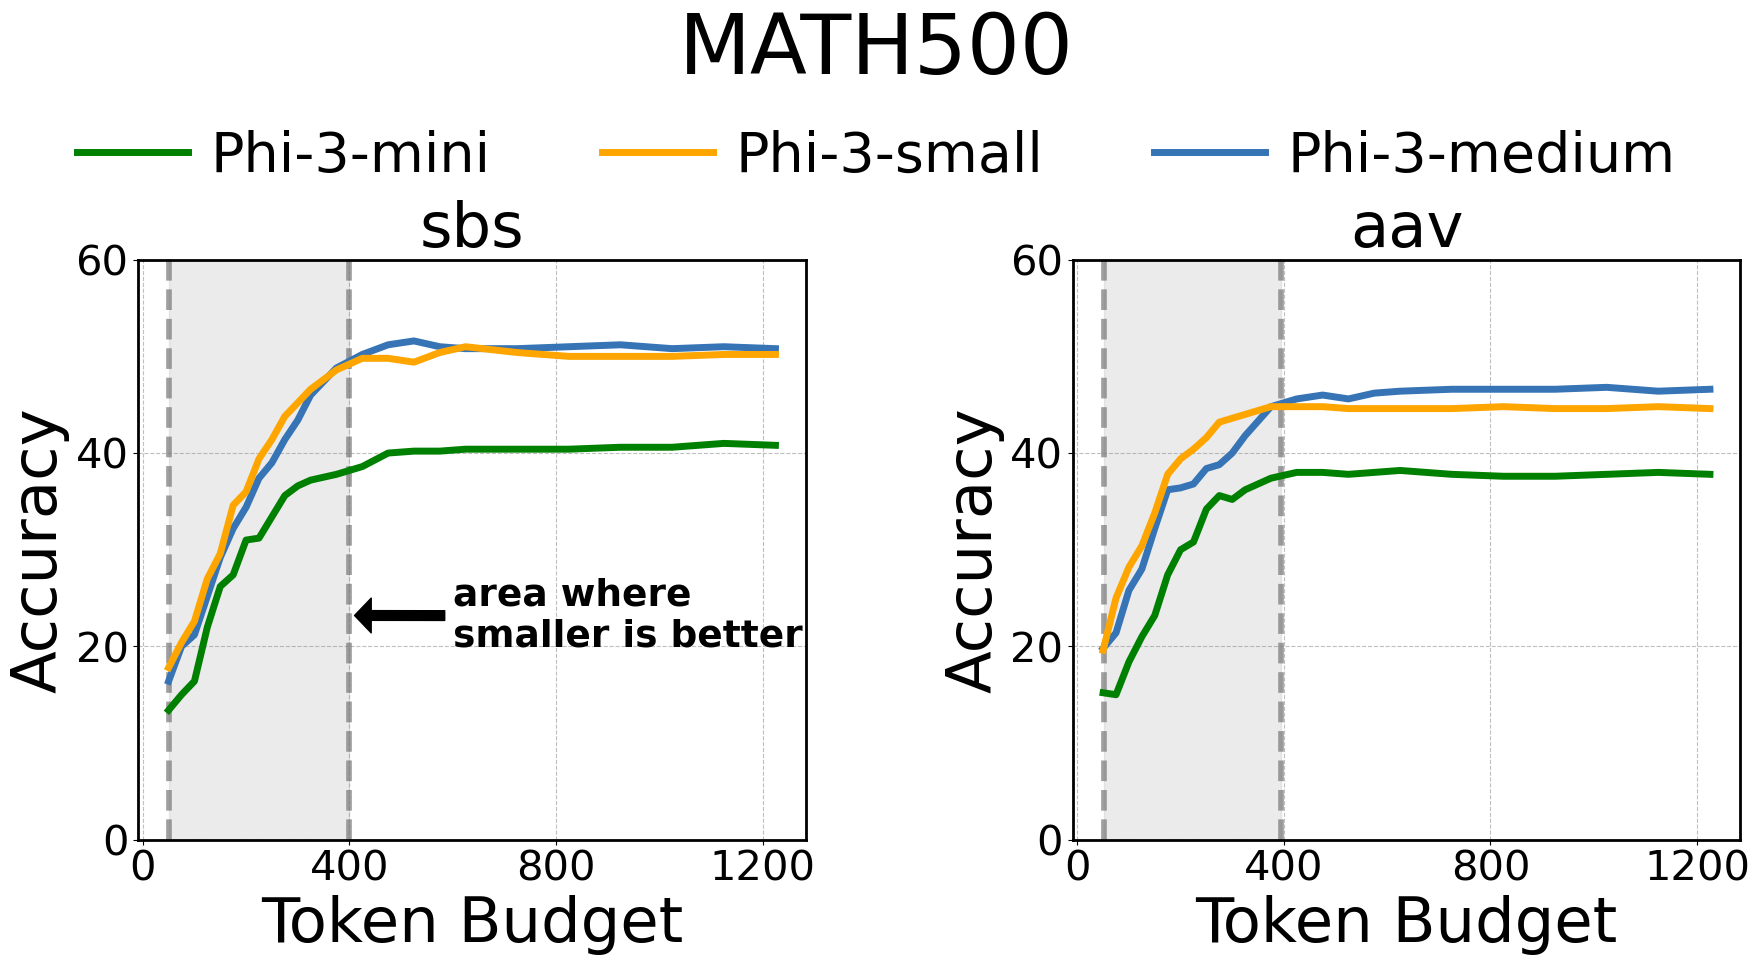

In [11]:
# Create 2x5 subplots for each prompt type
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fontsize = 45
phi3_model_list = [
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
]

colors = ["#3674B5", "orange", "green"]

for index, prompt_type in enumerate(PROMP_LIST):
    # Convert single index to row, col indices
    for model in phi3_model_list:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        axs[index].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1] + "-" + model.split("/")[-1].split("-")[2], linewidth=5, color=colors[phi3_model_list.index(model)])
    
    axs[1].axvline(
        x=52,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[1].axvline(
        x=395,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[1].axvspan(
        xmin=52, 
        xmax=395,           # x range
        # y1=0, y2=100,          # y range
        color='grey',      # fill color
        alpha=0.08,             # transparency
        zorder=0               # ensure shading is behind lines
    )

    # axs[1].axvspan(
    #     xmin=65,
    #     xmax=290,           # x range
    #     color='grey',      # fill color
    #     alpha=0.03,             # transparency
    #     zorder=0               # ensure shading is behind lines
    # )

    # axs[1].axvline(
    #     x=65,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=4,        # line width
    #     alpha=0.1,         # transparency
    #     zorder=1           # layer order
    # )
    # axs[1].axvline(
    #     x=290,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=4,        # line width
    #     alpha=0.1,         # transparency
    #     zorder=1           # layer order
    # )

    axs[0].axvspan(
        xmin=50, 
        xmax=400,           # x range
        color='grey',      # fill color
        alpha=0.08,             # transparency
        zorder=0               # ensure shading is behind lines
    )
    axs[0].axvline(
        x=50,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[0].axvline(
        x=400,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )

    # if index == 0:
    #     model1 = "microsoft/Phi-3-medium-128k-instruct"
    #     model2 = "microsoft/Phi-3-small-128k-instruct"
    #     budget_list1 = np.array(gen_budget_list(1, dataset, model1))  # Convert to NumPy array
    #     budget_list2 = np.array(gen_budget_list(1, dataset, model2))  # Convert to NumPy array
    #     if "hard" not in prompt_type:
    #         budget_list1 = budget_list1 + 25
    #         budget_list2 = budget_list2 + 25
        
    #     y1 = model_acc_dicts[model1][MODEL_SERIES_MAP[model1] + prompt_type]
    #     y2 = model_acc_dicts[model2][MODEL_SERIES_MAP[model2] + prompt_type]
        
    #     # Fill between the two lines from x=50 to x=400
    #     axs[index].fill_between(budget_list1, y1, y2, where=(budget_list1 >= 50) & (budget_list1 <= 400), color='red', alpha=0.2)
    
    axs[index].set_xlabel("Token Budget", fontsize=fontsize)
    axs[index].set_ylabel("Accuracy", fontsize=fontsize)
    axs[index].set_title(prompt_type[1:], fontsize=fontsize)
    # axs[index].legend(fontsize=30)
    axs[index].set_yticks(range(0, 61, 20)) 
    axs[index].set_xticks(range(0, 1201, 400))  
    axs[index].tick_params(axis='both', which='major', labelsize=30)

    axs[index].grid(True, 
                    which='major',
                    color='grey',
                    linestyle='--',
                    alpha=0.5) 
    axs[index].tick_params(axis='both', which='major', labelsize=30)

plt.suptitle(f"{dataset}".upper(), fontsize=60)
for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')

axs[0].annotate('area where \nsmaller is better', 
    xy=(400, 23.2),          # Point to annotate
    xytext=(600, 20),      # Text position
    fontsize=27,
    weight='bold',
    arrowprops=dict(
        facecolor='black',
        shrink=0.05,
        width=7,
        headwidth=25
    )
)

# axs[1].annotate('area where \nsmaller is better', 
#     xy=(400, 25),          # Point to annotate
#     xytext=(600, 20),      # Text position
#     fontsize=30,
#     arrowprops=dict(
#         facecolor='black',
#         shrink=0.05,
#         width=3,
#         headwidth=12
#     )
# )

from matplotlib.lines import Line2D
legend_lines = [
    Line2D([0], [0], color='green', linestyle='-', linewidth=line_width, label='Phi-3-mini'),
    Line2D([0], [0], color='orange', linestyle='-', linewidth=line_width, label='Phi-3-small'),
    Line2D([0], [0], color='#3674B5', linestyle='-', linewidth=line_width, label='Phi-3-medium'),

]

fig.legend(handles=legend_lines,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.91),
        ncol=6,
        columnspacing=2.0,      # Adjust spacing between columns (default is 2.0)
        handletextpad=0.4,      # Adjust spacing between line and text (default is 0.8)
        borderpad=0.4,          # Adjust internal padding (default is 0.4)
        fontsize=40,
        frameon=False,
        fancybox=True,
        shadow=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(
    left=0.09,      # Left margin
    right=0.98,     # Right margin
    bottom=0.15,    # Bottom margin
    top=0.73,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.3     # Height spacing between subplots
)
plt.savefig("findings3_math500.pdf")

In [12]:
# import seaborn as sns

# # Set Seaborn style
# sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.7"})
# fig, axs = plt.subplots(2,3, figsize=(25, 22))
# line_width = 5   # Set the desired line width
# fontsize = 35
# # set the title
# fig.suptitle(f"{dataset}".upper(), fontsize=50, y=0.9)

# # Flatten the axes array for easy iteration
# axs = axs.flatten()

# for index, prompt_type in enumerate(PROMP_LIST):
#     # Convert single index to row, col indices
#     for model in phi3_model_list:
#         budget_list = gen_budget_list(1, dataset, model)
#         if "hard" not in prompt_type:
#             budget_list = [budget + 25 for budget in budget_list]
#         axs[index].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1] + "-" + model.split("/")[-1].split("-")[2], linewidth=line_width)

#     for model in qwen_model_list:
#         budget_list = gen_budget_list(1, dataset, model)
#         if "hard" not in prompt_type:
#             budget_list = [budget + 25 for budget in budget_list]
#         axs[index + 3].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1], linewidth=line_width)

#     axs[index].set_xlabel("Token Budget", fontsize=fontsize)
#     axs[index].set_ylabel("Accuracy", fontsize=fontsize)
#     axs[index].set_title(prompt_type[1:], fontsize=fontsize)
#     axs[index].legend(fontsize=20)
#     axs[index].set_yticks(range(0, 101, 25)) 
#     axs[index].set_xticks(range(0, 1201, 400))  
#     axs[index].tick_params(axis='both', which='major', labelsize=30)
#     axs[index + 3].set_xlabel("Token Budget", fontsize=fontsize)
#     axs[index + 3].set_ylabel("Accuracy", fontsize=fontsize)
#     axs[index + 3].set_title(prompt_type[1:], fontsize=fontsize)
#     axs[index + 3].legend(fontsize=20)
#     axs[index + 3].set_yticks(range(0, 81, 20))
#     axs[index + 3].set_xticks(range(0, 1201, 400))
#     axs[index + 3].tick_params(axis='both', which='major', labelsize=30)

#     axs[0].axvline(
#         x=52,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )
#     axs[0].axvline(
#         x=395,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )
#     axs[0].axvspan(
#         xmin=52, 
#         xmax=395,           # x range
#         # y1=0, y2=100,          # y range
#         color='grey',      # fill color
#         alpha=0.03,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )

#     axs[1].axvspan(
#         xmin=65,
#         xmax=290,           # x range
#         color='grey',      # fill color
#         alpha=0.05,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )

#     axs[1].axvline(
#         x=65,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )
#     axs[1].axvline(
#         x=290,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )

#     axs[2].axvspan(
#         xmin=50, 
#         xmax=400,           # x range
#         color='grey',      # fill color
#         alpha=0.03,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )
#     axs[2].axvline(
#         x=50,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )
#     axs[2].axvline(
#         x=400,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )

#     axs[3].axvspan(
#         xmin=50, 
#         xmax=750,           # x range
#         color='grey',      # fill color
#         alpha=0.06,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )
#     axs[3].axvline(
#         x=50,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )
#     axs[3].axvline(
#         x=750,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )

#     axs[5].axvspan(
#         xmin=50, 
#         xmax=410,           # x range
#         color='grey',      # fill color
#         alpha=0.03,             # transparency
#         zorder=0               # ensure shading is behind lines
#     )
#     axs[5].axvline(
#         x=50,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )
#     axs[5].axvline(
#         x=410,               # x position
#         color='gray',       # line color
#         linestyle='--',     # dashed line
#         linewidth=4,        # line width
#         alpha=0.1,         # transparency
#         zorder=1           # layer order
#     )

# for ax in axs:
#     for spine in ax.spines.values():
#         spine.set_linewidth(2)
#         spine.set_color('black')
# # Adjust layout
# plt.tight_layout()
# # fig.subplots_adjust(top=0.9)
# plt.subplots_adjust(
#     left=0.08,      # Left margin
#     right=0.98,     # Right margin
#     bottom=0.1,    # Bottom margin
#     top=0.8,       # Top margin
#     wspace=0.4,    # Width spacing between subplots
#     hspace=0.4     # Height spacing between subplots
# )
# plt.savefig("findings3_math500_all.pdf")